In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
train=pd.read_csv("titanic_train.csv")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

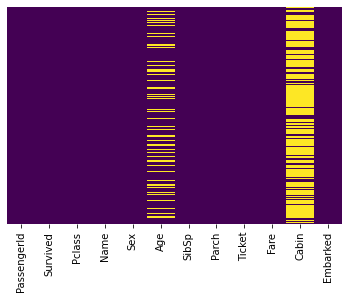

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#To see the plot with White Grid

In [10]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

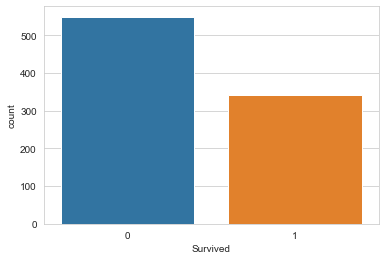

In [11]:
#To know count of survived by groupby survived column
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

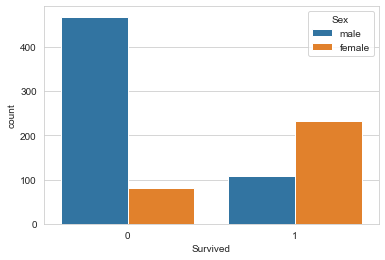

In [15]:
sns.countplot(x='Survived',hue='Sex',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

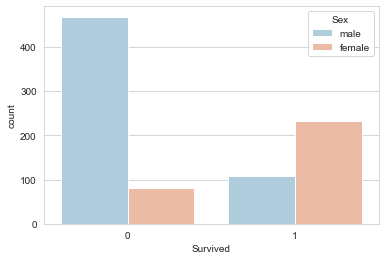

In [17]:
# More men not survived(0)
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

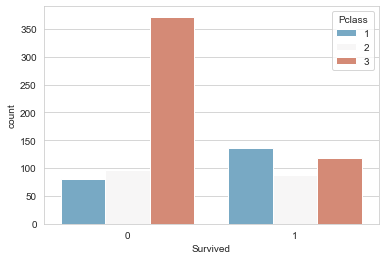

In [21]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='RdBu_r')

To know which class Survived most(1st Class Survived most(1), 3rd class Not survived(0))

<AxesSubplot:xlabel='Survived', ylabel='count'>

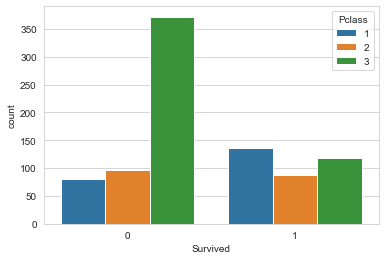

In [19]:
sns.countplot(x='Survived',hue='Pclass',data=train)

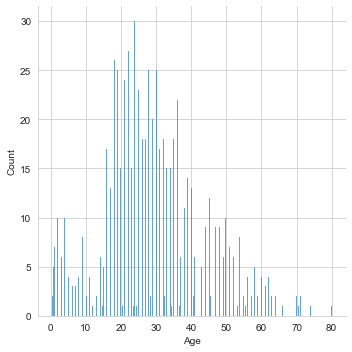

In [23]:
sns.displot(train['Age'].dropna(),kde=False,bins=300)

<AxesSubplot:ylabel='Frequency'>

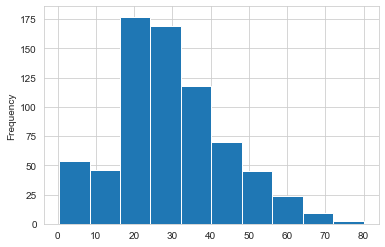

In [26]:
train['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

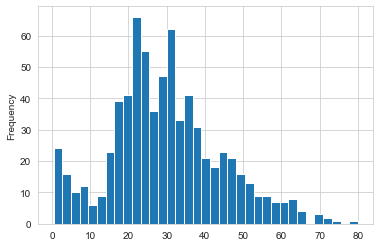

In [27]:
train['Age'].plot.hist(bins=35)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

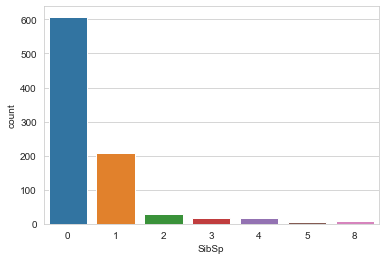

In [30]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

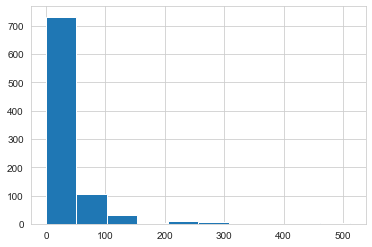

In [31]:
train['Fare'].hist()

<AxesSubplot:>

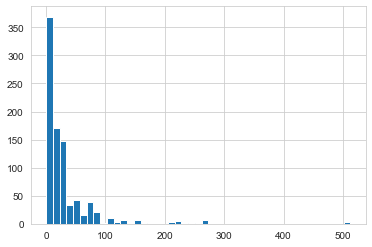

In [32]:
train['Fare'].hist(bins=45)

<AxesSubplot:>

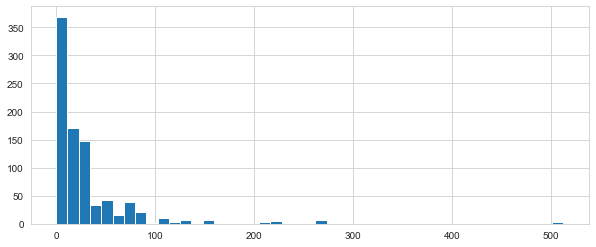

In [34]:
train['Fare'].hist(bins=45,figsize=(10,4))

In [35]:
import cufflinks as cf

In [37]:
cf.go_offline()

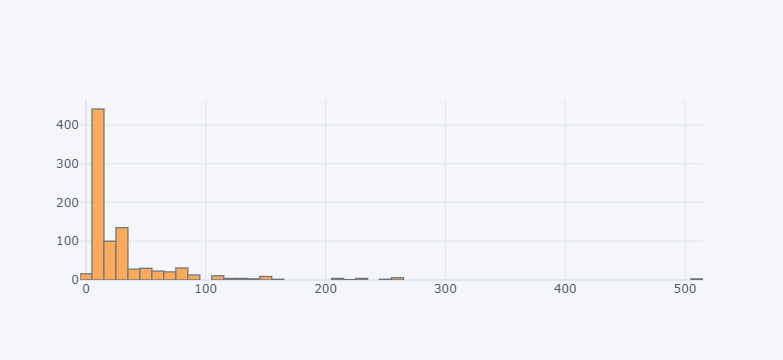

In [38]:
train['Fare'].iplot(kind='hist')

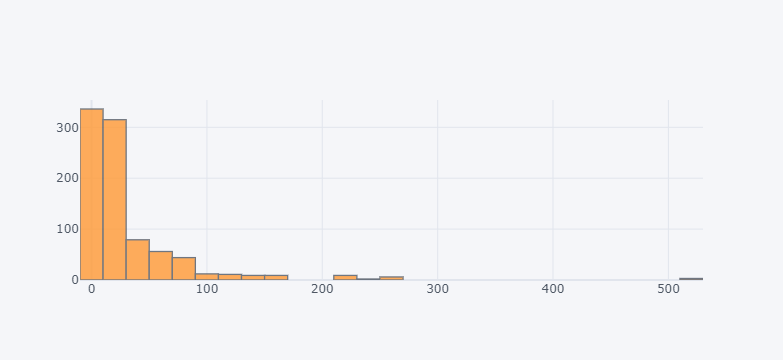

In [39]:
train['Fare'].iplot(kind='hist',bins=35)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

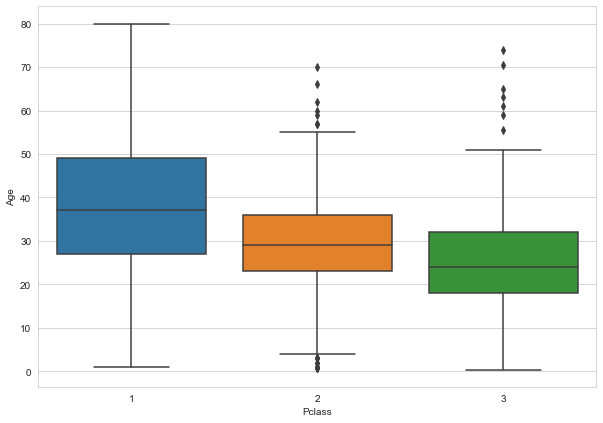

In [44]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

<AxesSubplot:xlabel='Pclass'>

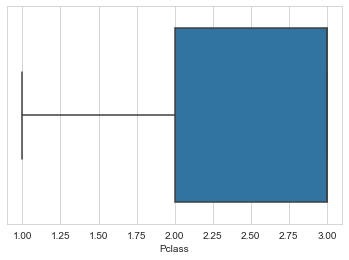

In [41]:
sns.boxplot(x='Pclass',data=train)

In [ ]:
#To Fill Age's null value by applying values

In [45]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        if Pclass==2:
            return 29
        else:
            return 24
        
    else:
        return Age
    

In [46]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [48]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

In [49]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:>

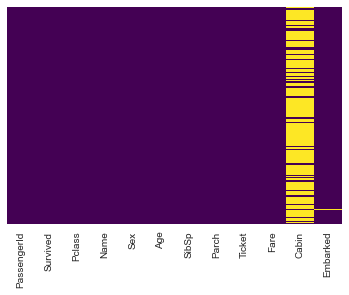

In [50]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [51]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#To drop cabin column
train.drop('Cabin',axis=1,inplace=True)

In [55]:
train.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

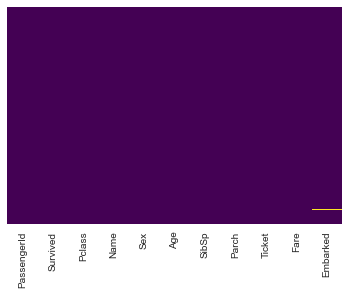

In [56]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [57]:
#to drop few records of null values
train.dropna(inplace=True)

<AxesSubplot:>

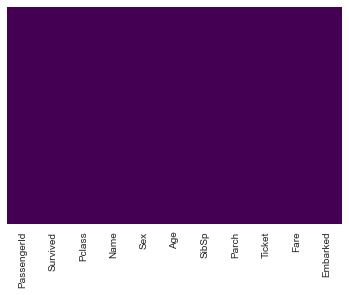

In [58]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [59]:
#to remove female column, ML algorithm predict
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [60]:
pd.get_dummies(train['Sex'],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [63]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [64]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [65]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [66]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [67]:
#To join sex and embark dataframe to TRAIN df
train=pd.concat([train,sex,embark],axis=1)

In [68]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [69]:
#To drop Existing Embarked and Sex column from Train df and also drop Text column
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)


In [70]:
train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0


In [71]:
#No need of Id column
train.drop(['PassengerId'],axis=1,inplace=True)

In [72]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


In [74]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [75]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,24.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [76]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [81]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
6,1,54.0,0,0,51.8625,1,0,1
576,2,34.0,0,0,13.0000,0,0,1
445,1,4.0,0,2,81.8583,1,0,1
74,3,32.0,0,0,56.4958,1,0,1
670,2,40.0,1,1,39.0000,0,0,1
...,...,...,...,...,...,...,...,...
107,3,24.0,0,0,7.7750,1,0,1
271,3,25.0,0,0,0.0000,1,0,1
862,1,48.0,0,0,25.9292,0,0,1
436,3,21.0,2,2,34.3750,0,0,1


In [82]:
X_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
281,3,28.0,0,0,7.8542,1,0,1
435,1,14.0,1,2,120.0000,0,0,1
39,3,14.0,1,0,11.2417,0,0,0
418,2,30.0,0,0,13.0000,1,0,1
585,1,18.0,0,2,79.6500,0,0,1
...,...,...,...,...,...,...,...,...
711,1,37.0,0,0,26.5500,1,0,1
840,3,20.0,0,0,7.9250,1,0,1
381,3,1.0,0,2,15.7417,0,0,0
141,3,22.0,0,0,7.7500,0,0,1


In [83]:
y_train

6      0
576    1
445    1
74     1
670    1
      ..
107    1
271    1
862    1
436    0
103    0
Name: Survived, Length: 595, dtype: int64

In [84]:
y_test

281    0
435    1
39     1
418    0
585    1
      ..
711    0
840    0
381    1
141    1
174    0
Name: Survived, Length: 294, dtype: int64

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
logmodel=LogisticRegression()

In [87]:
#To train the model will Introduce .fit
logmodel.fit(X_train,y_train)

c:\users\swaprabhu\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [88]:
predictions=logmodel.predict(X_test)

In [89]:
from sklearn.metrics import classification_report

In [90]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       184
           1       0.75      0.76      0.76       110

    accuracy                           0.82       294
   macro avg       0.80      0.81      0.80       294
weighted avg       0.82      0.82      0.82       294



In [91]:
from sklearn.metrics import confusion_matrix


In [92]:
confusion_matrix(y_test,predictions)

array([[156,  28],
       [ 26,  84]], dtype=int64)